# Tarea semanal 1
## Martín Deleón 
### Consignas: 
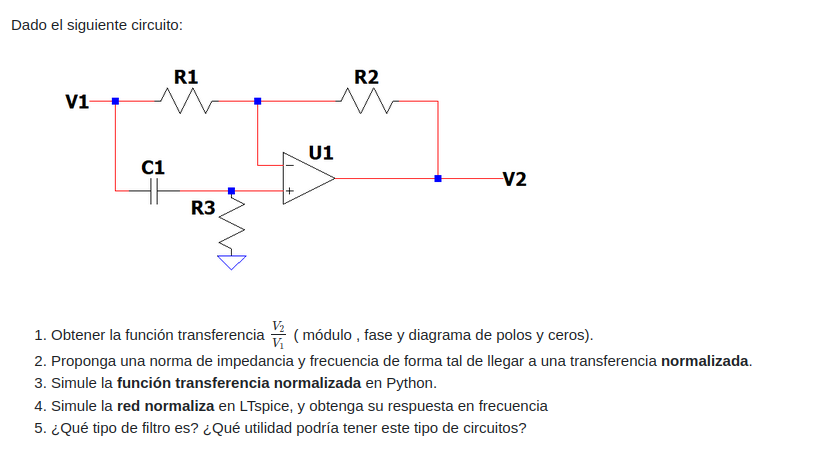

## Busqueda de la función transferencia

El siguiente desarrollo se realizó asumiendo que el amplificador operacional es ideal.

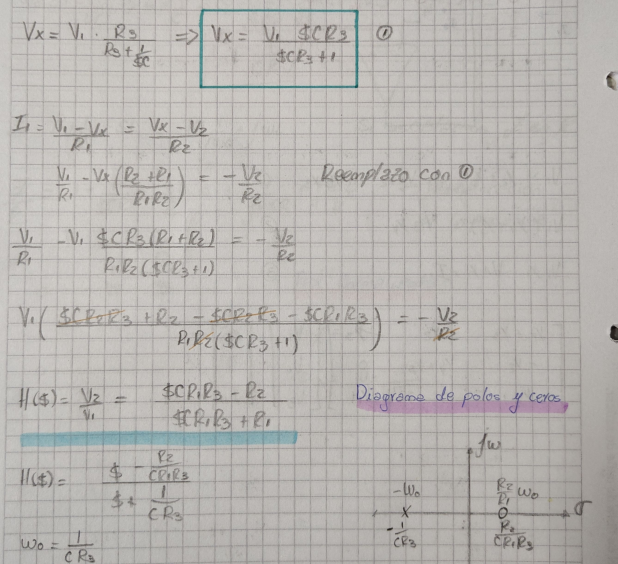

Al realizar una parametrizacón en frecuencia se obtiene la siguiente formula:

\begin {equation}
    H(S) = \frac{S-w*\frac{R2}{R1}}{S+w}
\end {equation}
 
donde w cumple la siguente condición:
\begin {equation}
    w = \frac{1}{C*R3}
\end {equation}
 
 Si reemplazamos con:
\begin {equation}
    w = 1
\end {equation}

Obtenemos la siguiente expresión de la función transferencia:
\begin {equation}
    H(S) = \frac{S-\frac{R2}{R1}}{S+1}
\end {equation}

Si analizamos la expresión obtenida vemos que segun el valor del cociente entre R2 y R1 cambiamos la función de filtrado, de esta forma podemos obtener un filtro pasa banda, un pasa bajos y un pasa altos.

Luego de realizar esta introducción matemática continuaremos con las simulaciones.


## Simulaciones

Primero se realizara la simulación del circuito en python y luego de presentar sus gráficos se realizaran tres simulaciones con distintos valores de resistencia en LTspice.

### Python

In [ ]:
# Módulos para Python, algo parecido a los #include de C

# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig

# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento

plt.figure(1)
plt.close(1)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# Podés modificar el ancho y alto de los gráficos que generás
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
# módulos numéricos y de funciones científicas
import numpy as np
from scipy import signal as sig

# Ahora importamos las funciones de PyTC2
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys

from pytc2.general import print_subtitle
from IPython.display import IFrame
IFrame("./sos_pb_lapiz.pdf", width=1000, height=1000)

Definiremos una constante "RT" con la intención de simplificar el codigo.

TransferFunctionContinuous(
array([ 1., -1.]),
array([1., 1.]),
dt: None
)

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

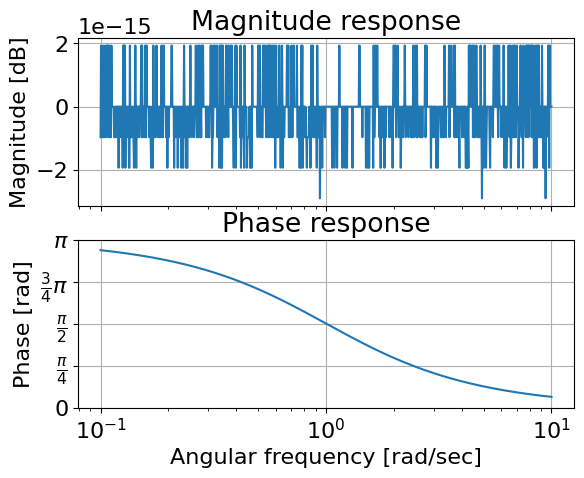

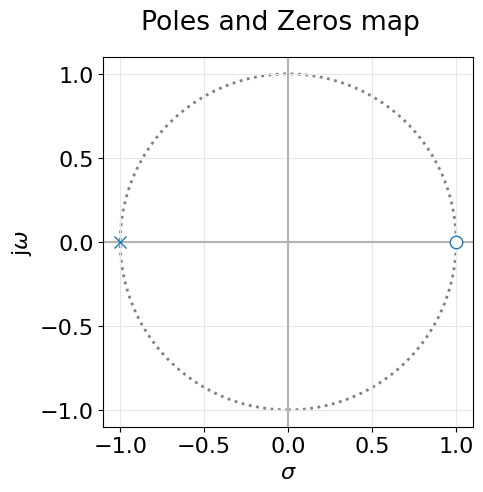

In [4]:
RT = 1  #Esta es la constante previamente mencionada
w = 1   #Frecuencia angular normalizada
num=np.array([1.,-RT*w])
den=np.array([1.,w])

#Buscamos la transferencia
H=sig.TransferFunction(num,den)
display(H)


_, axes_hdl = bodePlot(H)

plt.sca(axes_hdl[0])

pzmap(H)


En este caso dado que el cociente entre R2 y R1 vale 1 obtuvimos un filtro pasa todo. En el gráfico de polos y ceros podemos ver como los ceros estan en imágen especular de los polos.

Procedemos a realizar los mismos gráficos pero para un filtro pasa bajos.


TransferFunctionContinuous(
array([ 1., -2.]),
array([1., 1.]),
dt: None
)

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

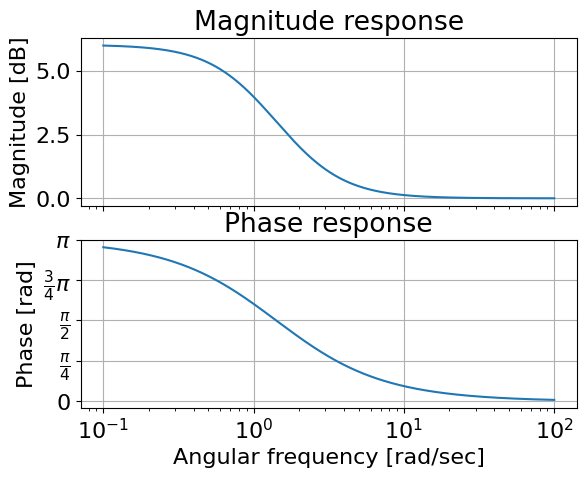

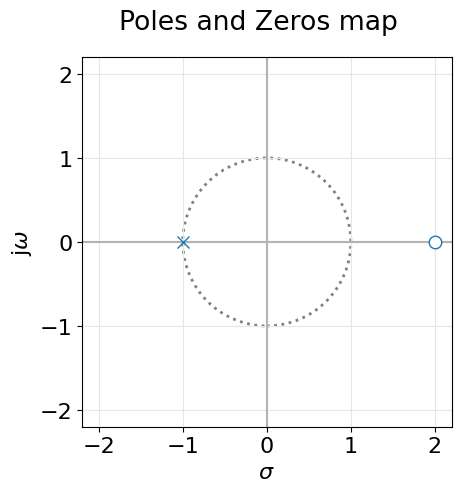

In [5]:
RT = 2  #Esta es la constante previamente mencionada
w = 1   #Frecuencia angular normalizada
num=np.array([1.,-RT*w])
den=np.array([1.,w])

#Buscamos la transferencia
H=sig.TransferFunction(num,den)
display(H)


_, axes_hdl = bodePlot(H)

plt.sca(axes_hdl[0])

pzmap(H)

Por último procedemos a realizar los mismos gráficos pero para un filtro pasa altos

TransferFunctionContinuous(
array([ 1. , -0.1]),
array([1., 1.]),
dt: None
)

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

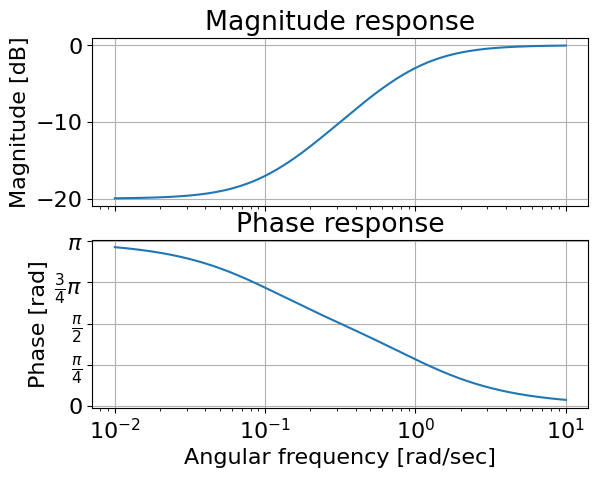

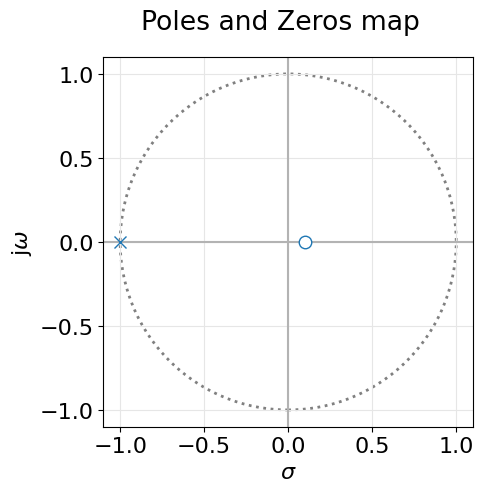

In [6]:
RT = 0.1  #Esta es la constante previamente mencionada
w = 1   #Frecuencia angular normalizada
num=np.array([1.,-RT*w])
den=np.array([1.,w])

#Buscamos la transferencia
H=sig.TransferFunction(num,den)
display(H)


_, axes_hdl = bodePlot(H)

plt.sca(axes_hdl[0])

pzmap(H)

### LTspice


Se simulará el siguiente circuito

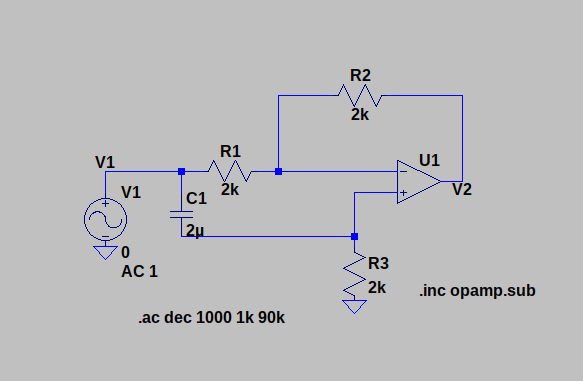

Al realizar un análisis en AC obtenemos las siguientes respuestas:

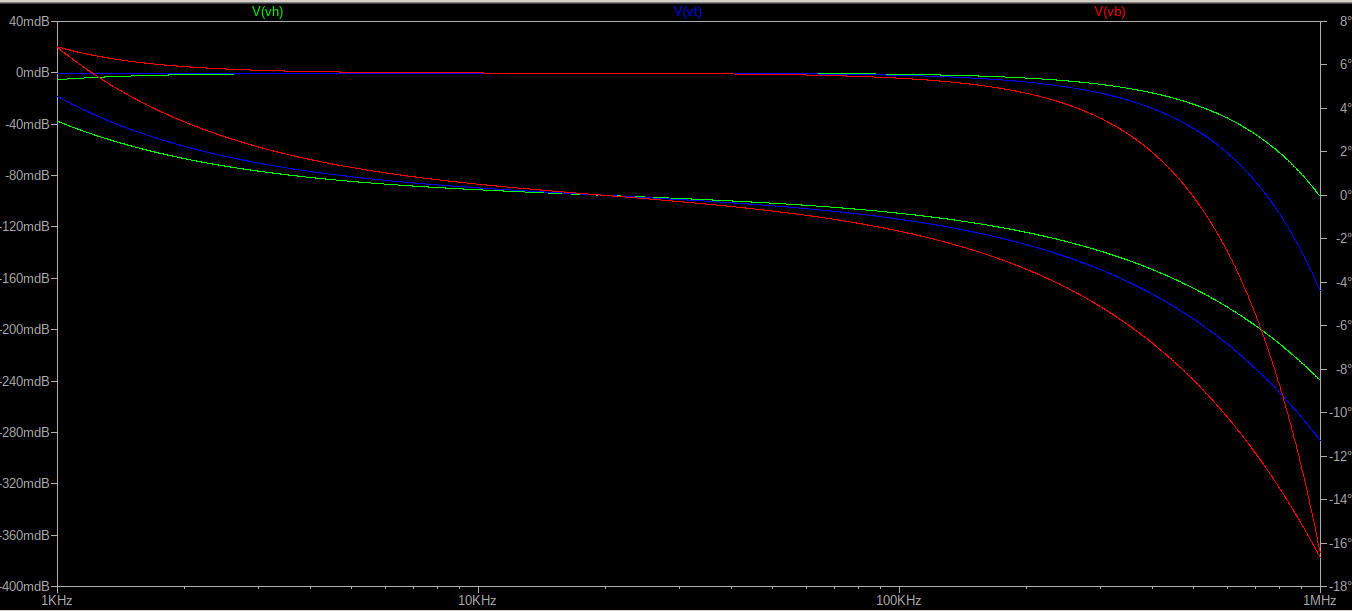

Donde Vh es la transferencia del pasa altos, Vb es la del pasa bajos y por último Vt es la transferencia del pasa todo.
Si aumentamos la frecuencia final de análisis podemos ver que la fase termina en -90° como es de esperarse.

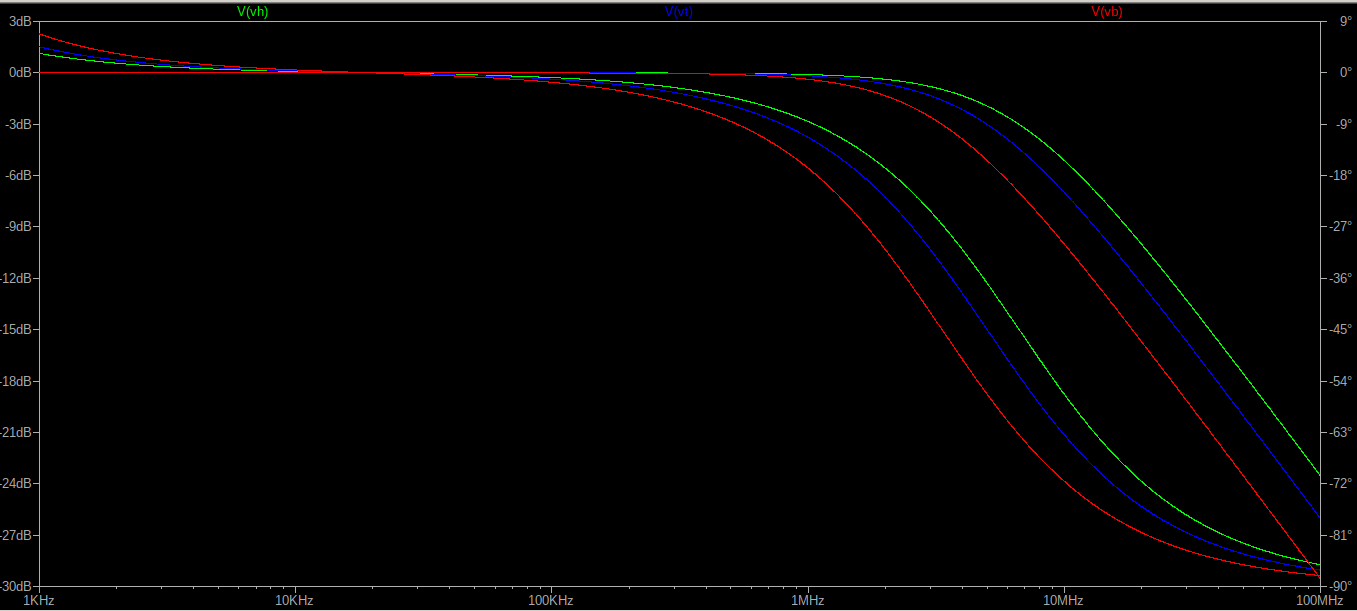
